**Problem Statement:**

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

Evaluation Criteria (100 points)

1. Importing the libraries & Reading the data file (10 points)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
print('Shape of Dataset - ',df.shape)
print('Total No. of News Articles - ',df['Category'].nunique(),':',df['Category'].unique())
print('News Article per category - \n',df['Category'].value_counts())
print('Shape of Dataset - ',df.shape)

Shape of Dataset -  (2225, 2)
Total No. of News Articles -  5 : ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics']
News Article per category - 
 Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64
Shape of Dataset -  (2225, 2)


Categorical to Numerical Encoding :
 Now, we will map each of these categories to a number, so that our model can understand it in a better way and we will save this in a new column named ‘category_id’. Where each of the categories are represented in numerical.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category_id']=le.fit_transform(df['Category'])
df.head()

,Category,Article,Category_id
0,Technology,tv future in the hands of viewers with home th...,4
1,Business,worldcom boss left books alone former worldc...,0
2,Sports,tigers wary of farrell gamble leicester say ...,3
3,Sports,yeading face newcastle in fa cup premiership s...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1


Data Visualisation

<Axes: xlabel='Category'>

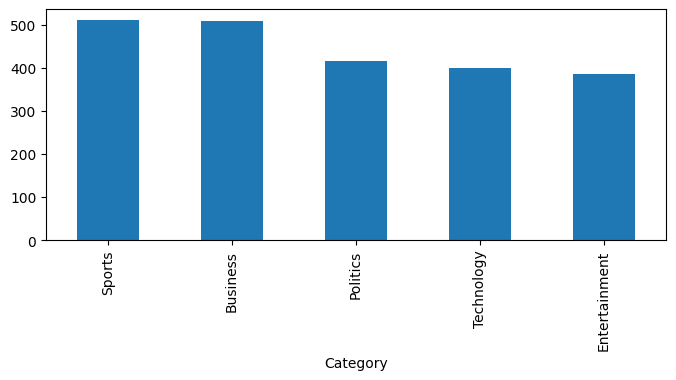

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
df['Category'].value_counts().plot(kind='bar')

3. Processing the Textual Data i.e. the news article(30 points)
 * Removing the non-letters

 * Tokenizing the text

 * Removing stopwords

 * Lemmatization

In [ ]:
### Removing Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
  clean_text=' '.join([i for i in text.split() if i not in stopwords.words('english')])
  return clean_text

df['Article']=df['Article'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
### Removing Punctuations
import string

def remove_punctuation(text):
  cleantext=''.join([i for i in text if i not in string.punctuation])
  return cleantext

df['Article']=df['Article'].apply(lambda x:remove_punctuation(x))

In [ ]:
### Lowering the Text
df['Article']=df['Article'].str.lower()

In [ ]:
### Stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stemming(text):
  clean_text=' '.join([ps.stem(i) for i in text.split()])
  return clean_text

df['Article']=df['Article'].apply(lambda x:stemming(x))

In [ ]:
### Lemmatization
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
nltk.download('wordnet')
def Lemmatize(text):
  clean_text=' '.join([wl.lemmatize(i) for i in text.split()])
  return clean_text

df['Article']=df['Article'].apply(lambda x:Lemmatize(x))
df['Article']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Article
0,tv futur hand viewer home theatr system plasma...
1,worldcom bos left book alon former worldcom bo...
2,tiger wari farrel gambl leicest say rush make ...
3,yead face newcastl fa cup premiership side new...
4,ocean twelv raid box offic ocean twelv crime c...
...,...
2220,car pull u retail figur u retail sale fell 03 ...
2221,kilroy unveil immigr polici exchatshow host ro...
2222,rem announc new glasgow concert u band rem ann...
2223,polit squabbl snowbal becom commonplac argu bl...


In [ ]:
### Tokenization

import nltk
from nltk.tokenize import word_tokenize ,sent_tokenize
nltk.download('punkt_tab')

word_cnt,unique_word_cnt=0,0

#Corpus of the entire Document
corpus=df['Article'].str.cat(sep=', ')
#print('corpus:',corpus)
print('Number of words in the entire corpus:',len(corpus))
#Find the letters used in Corpus
Unique_char=set(df['Article'].str.cat(sep=', '))
#print('Unique letters used in corpus:',Unique_char)

Vocabulary = df['Article'].str.cat(sep=', ')
#print(set(word_tokenize(Vocabulary[:20])))
for i in set(word_tokenize(Vocabulary)):
  unique_word_cnt+=1
print('Number of words in the vocabulary:',unique_word_cnt)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Number of words in the entire corpus: 3103845
Number of words in the vocabulary: 24187


4. Encoding and Transforming the data (20 points)

* Encoding the target variable

* Bag of Words

* TF-IDF

* Train-Test Split

In [ ]:
#### Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(df['Article'])
print("\nVocabulary:")
vocab_items = list(cv.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")

# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())



Vocabulary:
tv: 21968
futur: 9592
hand: 10474
viewer: 22775
home: 11036
theatr: 21308
system: 20974
plasma: 16780
highdefinit: 10865
digit: 7278
Bag of Words Matrix: (2225, 23821)
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
### TFIDF - Term Frequency/Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

TFIDF=tfidf.fit_transform(df['Article'])
print("\nVocabulary:")
vocab_items = list(tfidf.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")


# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())


Vocabulary:
tv: 21968
futur: 9592
hand: 10474
viewer: 22775
home: 11036
theatr: 21308
system: 20974
plasma: 16780
highdefinit: 10865
digit: 7278
TFIDF Matrix: (2225, 23821)
[[0.         0.01980977 0.         ... 0.         0.         0.        ]
 [0.         0.02479082 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02640372 0.         ... 0.         0.         0.        ]
 [0.         0.01673464 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
#### Train-test split
X=df['Article']

y=df['Category_id']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780,), (445,), (1780,), (445,))

In [ ]:
def conf_matrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  conf_mat = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_mat, annot=True, xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique(), cmap="YlGnBu", fmt='g')

**Exploring Multi-classification Models(classification models)**

**5. Model Training & Evaluation (30 points)**

Simple Approach - Naive Bayes

Functionalized Code (Optional)- Decision Tree,Nearest Neighbors,RandomForest

**1. Naive Bayes - MultinomialNB**

(1780,) (445,) (1780,) (445,)
accuracy 0.9617977528089887
['Sports']
['Technology']
               precision    recall  f1-score   support

     Business       0.96      0.95      0.96       101
Entertainment       1.00      0.88      0.93        81
     Politics       0.91      0.99      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.95      0.99      0.97        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



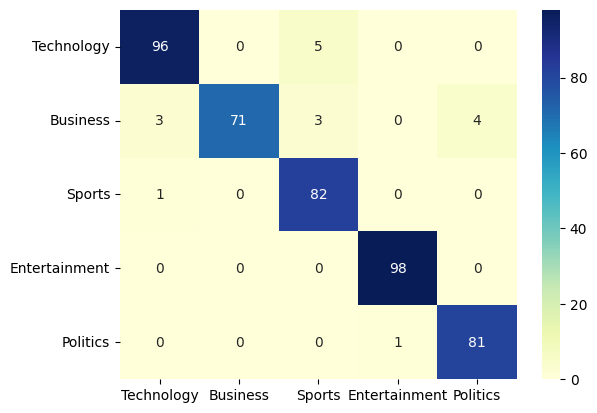

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df['Article']
y = df['Category']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas."
print(nb.predict([complaint]))
complaint = "tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow people to record store play pause and forward wind tv programmes when they want. essentially the technology allows for much more personalised tv. they are also being built-in to high-definition tv sets which are big business in japan and the us but slower to take off in europe because of the lack of high-definition programming. not only can people forward wind through adverts they can also forget about abiding by network and channel schedules putting together their own a-la-carte entertainment. but some us networks and cable and satellite companies are worried about what it means for them in terms of advertising revenues as well as brand identity and viewer loyalty to channels. although the us leads in this technology at the moment it is also a concern that is being raised in europe particularly with the growing uptake of services like sky+. what happens here today we will see in nine months to a years time in the uk adam hume the bbc broadcast s futurologist told the bbc news website. for the likes of the bbc there are no issues of lost advertising revenue yet. it is a more pressing issue at the moment for commercial uk broadcasters but brand loyalty is important for everyone. we will be talking more about content brands rather than network brands said tim hanlon from brand communications firm starcom mediavest. the reality is that with broadband connections anybody can be the producer of content. he added: the challenge now is that it is hard to promote a programme with so much choice. what this means said stacey jolna senior vice president of tv guide tv group is that the way people find the content they want to watch has to be simplified for tv viewers. it means that networks in us terms or channels could take a leaf out of google s book and be the search engine of the future instead of the scheduler to help people find what they want to watch. this kind of channel model might work for the younger ipod generation which is used to taking control of their gadgets and what they play on them. but it might not suit everyone the panel recognised. older generations are more comfortable with familiar schedules and channel brands because they know what they are getting. they perhaps do not want so much of the choice put into their hands mr hanlon suggested. on the other end you have the kids just out of diapers who are pushing buttons already - everything is possible and available to them said mr hanlon. ultimately the consumer will tell the market they want. of the 50 000 new gadgets and technologies being showcased at ces many of them are about enhancing the tv-watching experience. high-definition tv sets are everywhere and many new models of lcd (liquid crystal display) tvs have been launched with dvr capability built into them instead of being external boxes. one such example launched at the show is humax s 26-inch lcd tv with an 80-hour tivo dvr and dvd recorder. one of the us s biggest satellite tv companies directtv has even launched its own branded dvr at the show with 100-hours of recording capability instant replay and a search function. the set can pause and rewind tv for up to 90 hours. and microsoft chief bill gates announced in his pre-show keynote speech a partnership with tivo called tivotogo which means people can play recorded programmes on windows pcs and mobile devices. all these reflect the increasing trend of freeing up multimedia so that people can watch what they want when they want."
print(nb.predict([complaint]))

print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

**2. SGDClassifier**

Linear Support Vector Machine is widely regarded as one of the best text
classification algorithms.

accuracy 0.9640449438202248
               precision    recall  f1-score   support

     Business       0.96      0.91      0.93       101
Entertainment       0.96      0.98      0.97        81
     Politics       0.94      0.98      0.96        83
       Sports       0.98      1.00      0.99        98
   Technology       0.98      0.96      0.97        82

     accuracy                           0.96       445
    macro avg       0.96      0.97      0.96       445
 weighted avg       0.96      0.96      0.96       445



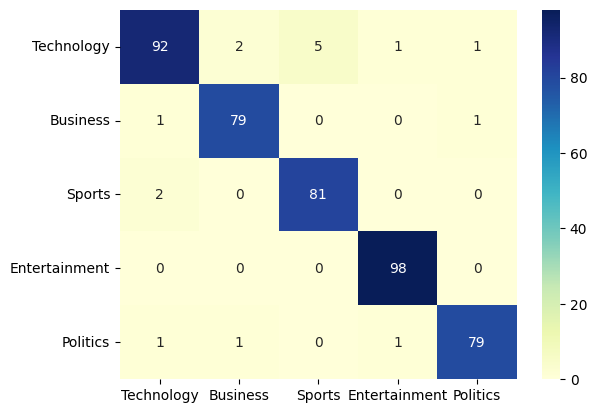

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

**Logistic Regression**

Simple and easy to understand classification algorithm, and Logistic regression can be easily generalized to multiple classes.

accuracy 0.9730337078651685
               precision    recall  f1-score   support

     Business       0.98      0.95      0.96       101
Entertainment       1.00      0.95      0.97        81
     Politics       0.93      0.99      0.96        83
       Sports       0.99      0.99      0.99        98
   Technology       0.96      0.99      0.98        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



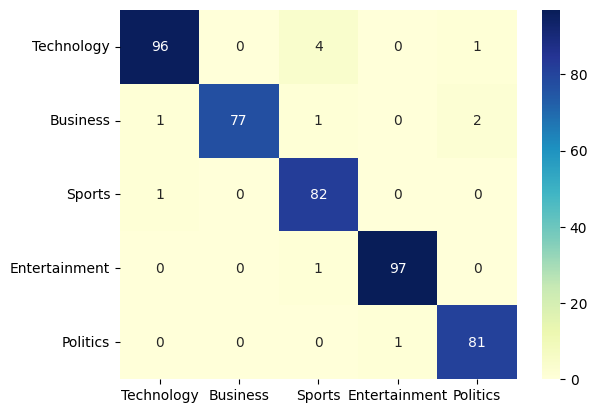

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

In [ ]:
complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas."

print(logreg.predict([complaint]))

['Technology']


In [ ]:
df[['Category','Category_id']].drop_duplicates()

,Category,Category_id
0,Technology,4
1,Business,0
2,Sports,3
4,Entertainment,1
5,Politics,2


**Word Embedding and Neural Networks**

Decision Tree

Most powerful tools of supervised learning algorithms used for both classification and regression tasks.
DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

accuracy 0.8853932584269663
               precision    recall  f1-score   support

   Technology       0.87      0.80      0.83       108
     Business       0.88      0.84      0.86        76
       Sports       0.83      0.94      0.88        72
Entertainment       0.95      0.94      0.95       107
     Politics       0.88      0.91      0.90        82

    micro avg       0.89      0.89      0.89       445
    macro avg       0.88      0.89      0.88       445
 weighted avg       0.89      0.89      0.88       445
  samples avg       0.89      0.89      0.89       445



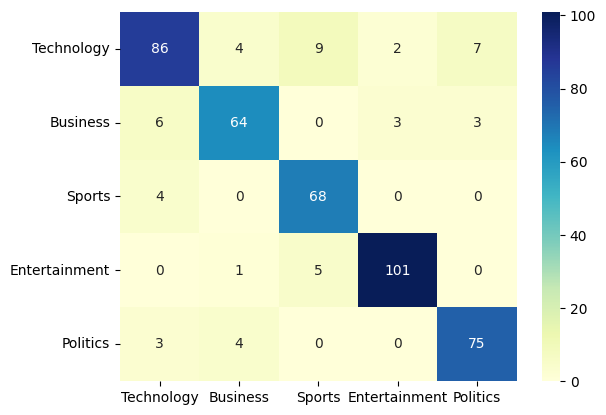

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

#plot_tree(model,filled=True,max_depth=2)

accuracy 0.8
               precision    recall  f1-score   support

   Technology       1.00      0.82      0.90       107
     Business       1.00      0.64      0.78        76
       Sports       1.00      0.82      0.90        79
Entertainment       1.00      0.93      0.96       103
     Politics       1.00      0.72      0.84        80

    micro avg       1.00      0.80      0.89       445
    macro avg       1.00      0.79      0.88       445
 weighted avg       1.00      0.80      0.89       445
  samples avg       0.80      0.80      0.80       445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


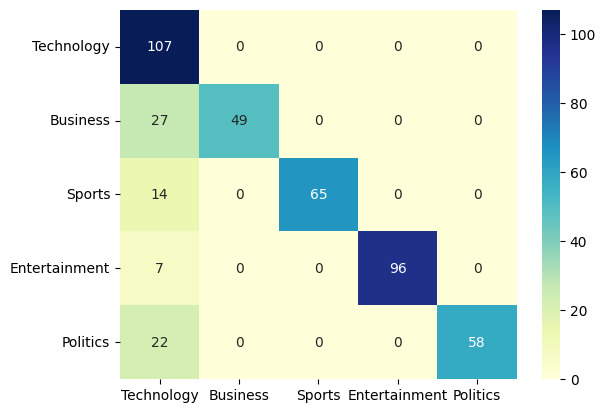

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

RFC=RandomForestClassifier(random_state=7,criterion='gini')
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)


print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

accuracy 0.647191011235955
               precision    recall  f1-score   support

   Technology       0.98      0.46      0.63       115
     Business       0.95      0.54      0.68        71
       Sports       0.88      0.70      0.78        84
Entertainment       0.56      1.00      0.72       116
     Politics       1.00      0.37      0.54        59

    micro avg       0.74      0.65      0.69       445
    macro avg       0.87      0.61      0.67       445
 weighted avg       0.85      0.65      0.68       445
  samples avg       0.65      0.65      0.65       445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


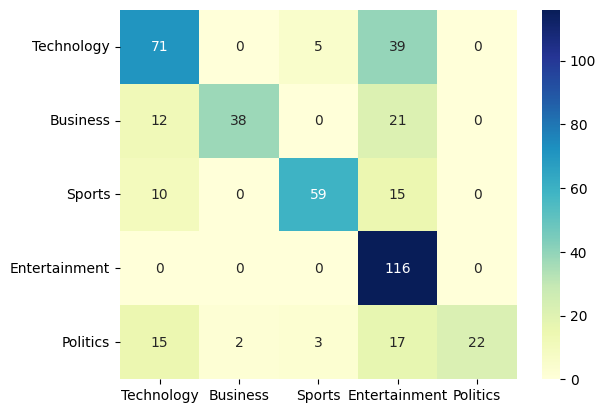

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,X.shape,y.shape

((1780, 23821), (445, 23821), (1780, 5), (445, 5), (2225, 23821), (2225, 5))

In [ ]:
df['Category'].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

* Best Accuracy came with Logistic Regression so far > 95%.

### Use Pre-trained Vectors - Word2Vec

In [ ]:
!pip install gensim

In [ ]:
pip install --upgrade numpy scipy

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=

In [ ]:
!pip install --upgrade --force-reinstall numpy gensim


  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp

In [ ]:
import gensim
from gensim.models import word2vec
import gensim.downloader as api

# This line lists all available pretrained models
print(list(api.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv=api.load('fasttext-wiki-news-subwords-300')

[[ 0.20188966  0.168247  ]
 [ 0.5583138   0.50207645]
 [-0.5685122   0.10687272]
 [-0.53361326 -0.01395208]
 [ 0.34192201 -0.7632442 ]]


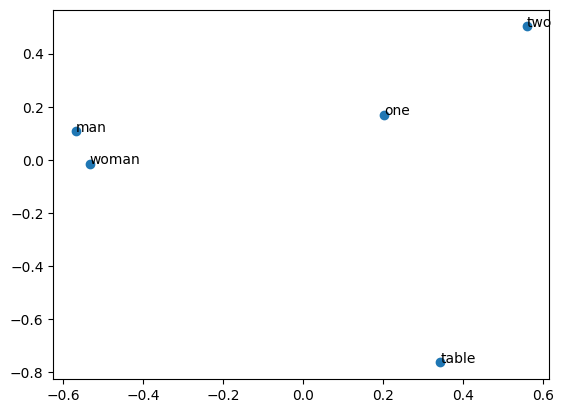

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words=['one','two','man','woman','table']
sample_vectors=np.array([wv[word] for word in words])
pca=PCA(n_components=2)
result=pca.fit_transform(sample_vectors)
print(result)
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))

In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res


# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    #print(doc,type(doc))
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
sent_vec("I am happy")
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
#print(stop_words)

import string
punctuations = string.punctuation
print(punctuations)
df['tokens'] = df['Article'].apply(spacy_tokenizer)
df['vectorized_Article'] = df['tokens'].apply(sent_vec)

df.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Category,Article,Category_id,tokens,vectorized_Article
0,Technology,tv futur hand viewer home theatr system plasma...,4,"[tv, futur, hand, viewer, home, theatr, system...","[-0.004710582320889153, -0.02678901268262568, ..."
1,Business,worldcom bos left book alon former worldcom bo...,0,"[worldcom, bos, leave, book, alon, worldcom, b...","[0.004217962484939822, -0.013723314312907556, ..."
2,Sports,tiger wari farrel gambl leicest say rush make ...,3,"[tiger, wari, farrel, gambl, leicest, rush, bi...","[0.012030211369274185, -0.023460262798083324, ..."
3,Sports,yead face newcastl fa cup premiership side new...,3,"[yead, face, newcastl, fa, cup, premiership, n...","[0.0202644535532251, -0.02434352703695727, 0.0..."
4,Entertainment,ocean twelv raid box offic ocean twelv crime c...,1,"[ocean, twelv, raid, box, offic, ocean, twelv,...","[-0.0002879695163452804, -0.004045635322755616..."


accuracy 0.9146067415730337
               precision    recall  f1-score   support

     Business       0.87      0.92      0.90       102
Entertainment       0.93      0.91      0.92        77
     Politics       0.89      0.87      0.88        84
       Sports       0.93      0.98      0.96       102
   Technology       0.96      0.88      0.92        80

     accuracy                           0.91       445
    macro avg       0.92      0.91      0.91       445
 weighted avg       0.92      0.91      0.91       445



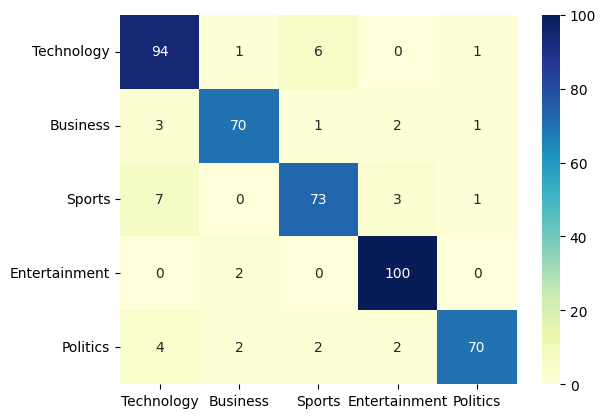

In [ ]:
X = df['vectorized_Article'].to_list()
y = df['Category'].to_list()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
LogisticRegression()
from sklearn import metrics
predicted = classifier.predict(X_test)
print('accuracy %s' % accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
conf_matrix(y_test, predicted)

In [ ]:
complaint = "ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took 16.1m (£8.4m). rounding out the top five was animated fable the polar express  starring tom hanks  and festive comedy christmas with the kranks.  ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us  after the three films in the lord of the rings trilogy. the sequel narrowly beat its 2001 predecessor  ocean s eleven which took 184m (£95.8m) in total. a remake of the 1960s film  starring frank sinatra and the rat pack  ocean s eleven was directed by oscar-winning director steven soderbergh. soderbergh returns to direct the hit sequel which reunites clooney  pitt and roberts with matt damon  andy garcia and elliott gould. catherine zeta-jones joins the all-star cast.  it s just a fun  good holiday movie   said dan fellman  president of distribution at warner bros. however  us critics were less complimentary about the $110m (£57.2m) project  with the los angeles times labelling it a  dispiriting vanity project . a milder review in the new york times dubbed the sequel  unabashedly trivial ."
complaint_token = spacy_tokenizer(complaint)
#complaint_token

X_pred=sent_vec(complaint_token).reshape(1,-1)
#X_pred

classifier.predict(X_pred)

array(['Entertainment'], dtype='<U13')